전처리

In [3]:
import pandas as pd

# CSV 파일에서 데이터 로드
data = pd.read_csv('tomato.csv')

# 수집일자는 날짜이므로 불필요하면 삭제
data = data.drop(columns=['수집일자'])

# 데이터 확인
print(data.head())


   건구 온도  습구 온도   근권  상대 습도  절대 습도  이슬점  수분 부족  이산화탄소
0    8.2    6.3  7.3   76.3    6.4  4.3    2.0   1037
1    8.2    6.5  7.3   77.9    6.6  4.6    1.9   1040
2    8.1    6.5  7.3   78.6    6.6  4.6    1.8   1041
3    8.1    6.6  7.4   80.9    6.8  5.1    1.6   1038
4    8.1    6.7  7.4   81.7    6.9  5.2    1.5   1035


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
data = pd.read_csv('tomato.csv')

# 수집일자 열 제거 (불필요한 데이터)
data = data.drop(columns=['수집일자'])

# 품질 레이블 정의 (예시로 온도와 습도 기반으로 정의)
data['품질'] = data.apply(lambda row: 1 if row['건구 온도'] > 8 and row['상대 습도'] > 75 else 0, axis=1)

# 입력 변수와 타겟 변수 분리
X = data.drop(columns=['품질'])
y = data['품질']

# 데이터 분할 (훈련용 데이터와 테스트용 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RandomForest 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy * 100:.2f}%')

# 중요 변수 출력 (모델이 중요하게 생각하는 변수)
feature_importances = model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance:.4f}')


모델 정확도: 100.00%
건구 온도: 0.2680
습구 온도: 0.1976
근권: 0.2511
상대 습도: 0.0363
절대 습도: 0.0998
이슬점: 0.1178
수분 부족: 0.0271
이산화탄소: 0.0023


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656 entries, 0 to 11655
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수집일자    11656 non-null  object 
 1   건구 온도   11656 non-null  float64
 2   습구 온도   11656 non-null  float64
 3   근권      11656 non-null  float64
 4   상대 습도   11656 non-null  float64
 5   절대 습도   11656 non-null  float64
 6   이슬점     11656 non-null  float64
 7   수분 부족   11656 non-null  float64
 8   이산화탄소   11656 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 819.7+ KB
None
                수집일자  건구 온도  습구 온도   근권  상대 습도  절대 습도  이슬점  수분 부족  이산화탄소
0  1/9/2021 00:03:00    8.2    6.3  7.3   76.3    6.4  4.3    2.0   1037
1  1/9/2021 00:08:00    8.2    6.5  7.3   77.9    6.6  4.6    1.9   1040
2  1/9/2021 00:13:00    8.1    6.5  7.3   78.6    6.6  4.6    1.8   1041
3  1/9/2021 00:18:00    8.1    6.6  7.4   80.9    6.8  5.1    1.6   1038
4  1/9/2021 00:23:00    8.1    6.7  7.4   81.7    6

/Users/hwang/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/hwang/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/hwang/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/hwang/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/hwang/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/hwang/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarn

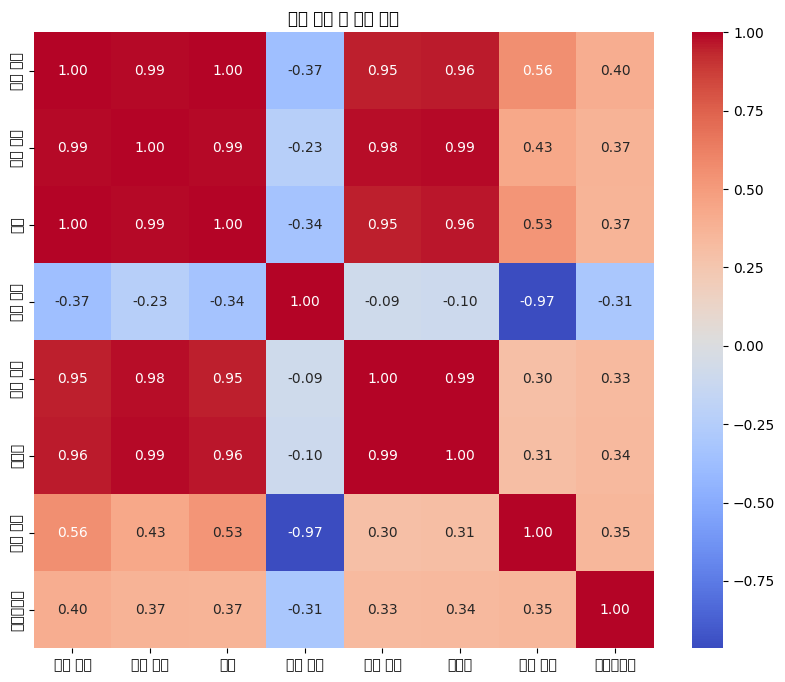

Mean Squared Error: 0.004767133965769604


/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE

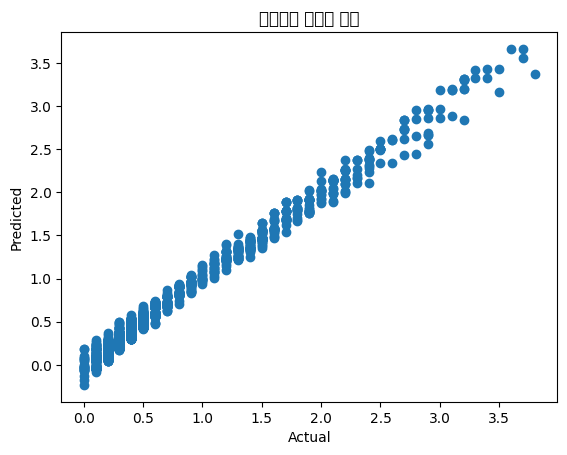

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 로드
df = pd.read_csv("tomato.csv")

# 데이터의 기본 정보 확인
print(df.info())
print(df.head())

# '수집일자'를 datetime 형식으로 변환 (잘못된 형식은 NaT로 처리)
df['수집일자'] = pd.to_datetime(df['수집일자'], errors='coerce')

# 변환 후 데이터 확인
print(df['수집일자'].head())
print(df['수집일자'].isna().sum())  # NaT 값의 개수 확인

# 데이터 타입 확인
print(df.dtypes)

# 수치형 데이터만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 상관 관계 분석
corr = numeric_df.corr()

# 상관 관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("환경 변수 간 상관 관계")
plt.show()

# 품질 예측을 위한 특성 선택 (예시: 이산화탄소와 온도가 품질에 미치는 영향)
# 예를 들어, 품질은 "수분 부족"이나 "근권 온도"와 같은 변수로 할 수 있습니다
X = df[['건구 온도', '습구 온도', '상대 습도', '절대 습도', '이산화탄소']]  # 특성 변수
y = df['수분 부족']  # 타겟 변수 (예시: 수분 부족 정도)

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 예측 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 예측 결과 시각화
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("실제값과 예측값 비교")
plt.show()


In [12]:
import pandas as pd

# 데이터 로드
df = pd.read_csv('tomato.csv')

# 품질 판단 함수 정의
def quality_judgment(row):
    # 각 변수의 기준값을 설정합니다 (이 값은 예시로 설정한 값입니다)
    if row['건구 온도'] > 30 and row['수분 부족'] > 3:
        return '저조'
    elif 20 <= row['건구 온도'] <= 30 and 2 <= row['수분 부족'] <= 3:
        return '보통'
    elif row['건구 온도'] < 20 and row['수분 부족'] < 2:
        return '우수'
    else:
        return '미정'

# 품질 판단 결과를 새로운 컬럼에 추가
df['품질'] = df.apply(quality_judgment, axis=1)

# 결과 확인
print(df[['수집일자', '건구 온도', '수분 부족', '품질']].head())


                수집일자  건구 온도  수분 부족  품질
0  1/9/2021 00:03:00    8.2    2.0  미정
1  1/9/2021 00:08:00    8.2    1.9  우수
2  1/9/2021 00:13:00    8.1    1.8  우수
3  1/9/2021 00:18:00    8.1    1.6  우수
4  1/9/2021 00:23:00    8.1    1.5  우수


In [13]:
import pandas as pd

# '수집일자'를 datetime 형식으로 변환
df['수집일자'] = pd.to_datetime(df['수집일자'], format='%d/%m/%Y %H:%M:%S')

# '수집일자'에서 날짜와 시간 분리
df['날짜'] = df['수집일자'].dt.date
df['시간'] = df['수집일자'].dt.hour

# 오전 6시, 오후 6시 데이터만 필터링
df_filtered = df[df['시간'].isin([6, 18])]

# 결과 확인
print(df_filtered[['수집일자', '건구 온도', '수분 부족', '품질']].head())


                  수집일자  건구 온도  수분 부족  품질
72 2021-09-01 06:03:00   10.8    1.6  우수
73 2021-09-01 06:08:00   10.6    1.7  우수
74 2021-09-01 06:13:00   10.6    1.6  우수
75 2021-09-01 06:18:00   10.6    1.6  우수
76 2021-09-01 06:23:00   10.6    1.6  우수
